In [1]:
import modu2
import tw.com.ken.net as kennet
import tw.com.iris.net as irisnet;
modu2.fun1()
kennet.connection()
irisnet.connection()

__name__:modu2
func1
Ken Code!
Iris Code!


In [1]:
from modu2 import Test1,fun1
fun1()
Test1()

__name__:modu2
func1
Create


## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|


In [3]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
f = open("data.txt",'w',encoding="utf-8")
f.write(text)
f.close()

In [5]:
dataList = []
while True:
    score= input("請輸入數字(quit離開)")
    if score == 'quit':
        break
    dataList.append(score)
file = open("score.txt",'w',encoding="utf-8")
file.write(str(dataList))    
file.close()

In [6]:
f = open("data.txt",'r',encoding="utf-8")
data = f.read()
print(data)
f.close()


python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。



## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

In [8]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if float(row[5]) > 100:
        print(row[0],row[1],row[2])

 104/01/03 2,640,781,030 64,138,886,194
 104/01/17 3,720,277,205 101,133,309,290
 104/01/30 4,540,373,544 143,900,658,474
 104/01/31 5,486,734,180 162,361,181,834


In [9]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
    if float(row["漲跌點數"]) > 9.43:
        print(row["日期"],row['成交金額'])

 104/01/03 64,138,886,194
 104/01/04 75,845,629,353
 104/01/05 76,850,752,698
 104/01/10 97,168,542,017
 104/01/17 101,133,309,290
 104/01/18 113,988,641,382
 104/01/30 143,900,658,474
 104/01/31 162,361,181,834


In [13]:
import csv
f = open("example.csv","r",encoding="utf-8")
csvData = csv.reader(f)
print(type(csvData))

csvList = list(csvData)
print(csvData)
print("=========================")
print(csvList)

<class '_csv.reader'>
[['日期', '成交股數', '成交金額', '成交筆數', '發行量加權股價指數', '漲跌點數'], [' 104/01/02', '2,104,640,545', '50,472,201,894', '497,889', '6,952.21', '-119.87'], [' 104/01/03', '2,640,781,030', '64,138,886,194', '623,192', '7,053.38', '101.17'], [' 104/01/04', '2,983,756,821', '75,845,629,353', '728,417', '7,082.97', '29.59'], [' 104/01/05', '3,062,757,248', '76,850,752,698', '737,780', '7,130.86', '47.89'], [' 104/01/06', '3,314,147,435', '88,101,921,548', '823,810', '7,120.51', '-10.35'], [' 104/01/09', '2,610,433,477', '71,323,370,369', '634,137', '7,093.04', '-27.47'], [' 104/01/10', '3,595,611,551', '97,168,542,017', '869,327', '7,178.87', '85.83'], [' 104/01/11', '3,322,390,467', '88,786,671,892', '802,539', '7,188.21', '9.34'], [' 104/01/12', '2,969,248,375', '78,947,910,460', '731,328', '7,186.58', '-1.63'], [' 104/01/13', '3,497,838,901', '99,286,437,370', '819,762', '7,181.54', '-5.04'], [' 104/01/16', '3,184,795,667', '76,842,611,338', '719,725', '7,103.62', '-77.92'], [' 104

## Json
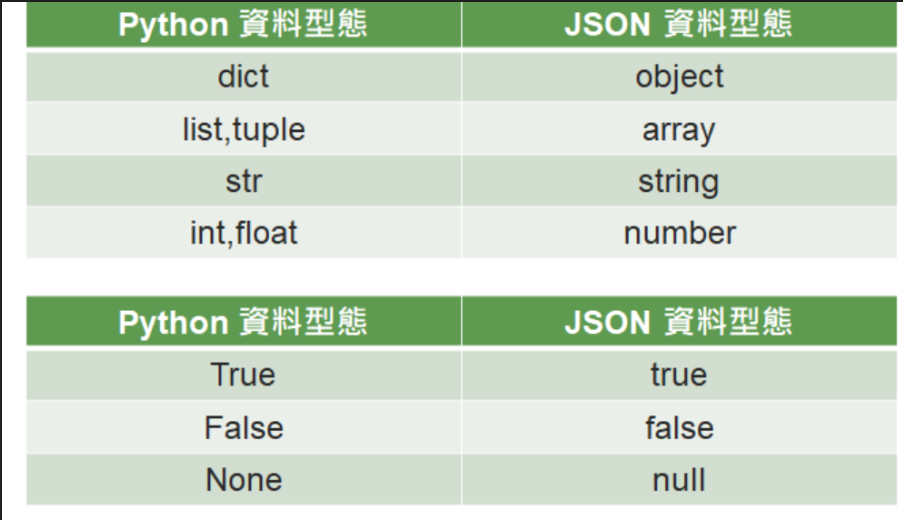
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [17]:
import json
json1 = {'課程':"python","gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsontStr = json.dumps(json1,ensure_ascii=False)
print(jsontStr)

{'課程': 'python', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"課程": "python", "gjun": 100, "python-class": true, "Line": null}


In [18]:
import json
json2 = {'課程':"python","gjun":100,"python-class":True,"Line":None}
outFile = open("data0.json","w",encoding="utf-8")
json.dump(json2,outFile,ensure_ascii=False)
outFile.close()

In [25]:
import json
json2 = {'課程':"python","gjun":100,"python-class":True,"Line":None}
with open("data0.json","w",encoding="utf-8") as outFile:
    json.dump(json2,outFile,ensure_ascii=False)
    

In [27]:
import json
data = {}
data['pepole'] = []
data['pepole'].append({
"name":"Ken",
"score":100,
"website":"ken.com.tw"
})
data['pepole'].append({
"name":"Vivin",
"score":75,
"website":"vivin.com.tw"
})
with open("data2.json","w",encoding="utf-8") as outFile:
    json.dump(data,outFile,ensure_ascii="utf-8",indent=2)

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [29]:
import json
jsonStr = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
obj = json.loads(jsonStr)
print(obj)
print(obj['python'])

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
good


In [30]:
import json
with open("data2.json","r",encoding="utf-8") as jsonFile:
    data = json.load(jsonFile)
print(data)    

{'pepole': [{'name': 'Ken', 'score': 100, 'website': 'ken.com.tw'}, {'name': 'Vivin', 'score': 75, 'website': 'vivin.com.tw'}]}


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [23]:
import os
class TestFile:
    def openFile(self,filePath):
        self.handle = open(filePath,"w")
        self.handle.close()
t = TestFile()
t.openFile("test.txt") 
os.remove("test.txt")               
print("success!")


PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

In [24]:
import os
class TestFile:
    def openFile(self,filePath):
       with open(filePath,"w") as f:#自動呼叫close
            f.write("test.txt")

t = TestFile()
t.openFile("test.txt") 
os.remove("test.txt")               
print("success!")

success!


## 壓縮與解壓縮 測試資料

In [36]:
import os
try:
    os.mkdir("test2")
    print("建立目錄成功")    
except:
    print("建立目錄失敗")  

with open("./test2/test2.txt",'a') as file:
    file.write("Test2!!!")
    print("完成檔案2")

with open("./test2/test3.txt",'a') as file:
    file.write("Test3!!!")
    print("完成檔案3")

print("查看目錄")
print(os.listdir("./test2"))

建立目錄失敗
完成檔案2
完成檔案3
查看目錄
['test2.txt', 'test3.txt']


## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。

In [42]:
import zipfile
import os
def create_zip(path):
    zf = zipfile.ZipFile(f"{path}.zip","w",zipfile.ZIP_DEFLATED)
    for root,dirs,files in os.walk(path):
       #print("root:",root,"dirs:",dirs,"files:",files)
       for fileName in files:
        filePath = os.path.join(root,fileName)
        zf.write(filePath)
        #print(filePath)
create_zip("test2")        

In [45]:
import zipfile
import shutil
filePath = "test2.zip"
zf = zipfile.ZipFile(filePath,'r')
print(zf.namelist())
try:
 shutil.rmtree("test2")
 print("刪除成功")
except:
  print("刪除失敗")
zf.extractall()


['test2/test2.txt', 'test2/test3.txt']
刪除成功


## BeautifulSoup Base
find() 只找第一個符合條件的

https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/#find-all

find_all() 找所有符合條件的

select_one() 只找一個符合條件的可直接使用css語法

select() 找所有符合條件的可使用css語法


In [5]:
from bs4 import BeautifulSoup
html='''<a id='a1' class="c1">V1</a>
<a id='a2' class="c1">V2</a>
<a id='a3' class="c3">V3</a>
'''
soup = BeautifulSoup(html,"html5lib")
print(soup.find(id="a1"))
print(soup.find(id="a3"))
print(soup.find_all(class_="c1"))

<a class="c1" id="a1">V1</a>
<a class="c3" id="a3">V3</a>
[<a class="c1" id="a1">V1</a>, <a class="c1" id="a2">V2</a>]
